In [12]:
envname = '/Users/mli853/Documents/placerg-main/variables/loop_stimvaryN512e-6.0et2.0.pkl'

In [3]:
# import stuff
from analyze import *
from simulate import*
from objects import *
from loop import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [4]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-v0_8')
fontsize=20
ticksize=20
fontsizesmall=25
ticksizesmall=20
legendsize=20
alpha=.3
colorfit='gray'
linecolor='black'
palit=['black','firebrick', 'crimson', 'orangered', 'darkorange', 'goldenrod', 'gold', 'khaki']
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [13]:
# load in objects
allo=load_object(envname) 
orderplot(allo)

In [14]:
if allo.labeltype[0]=='eta':
    maxx=np.max(np.array(allo.eta).flatten())
    minn=np.min(np.array(allo.eta).flatten())
    cc=allo.eta
if allo.labeltype[0]=='epsilon':
    maxx=np.max(np.array(allo.epsilon).flatten())
    minn=np.min(np.array(allo.epsilon).flatten())
    cc=allo.epsilon
if allo.labeltype[0]=='time constant':
    maxx=np.max(np.array(allo.timeconst).flatten())
    minn=np.min(np.array(allo.timeconst).flatten())
    cc=np.array(allo.timeconst)[:,0]
if allo.labeltype[0]=='# of stimuli':
    maxx=np.max(np.array(allo.stim).flatten())
    minn=np.min(np.array(allo.stim).flatten())
    cc=allo.stim
if allo.labeltype[0]=='p':
    maxx=np.max(np.array(allo.percell).flatten())
    minn=np.min(np.array(allo.percell).flatten())
    cc=allo.percell
mrange=maxx-minn

In [31]:
xplot,plot=(allo.eigspecx[h], allo.eigspec[h])
errplot=allo.eigspecerr[h]
print(range(len(xplot)),len(xplot), len(plot), len(errplot))

range(0, 5) 5 5 4


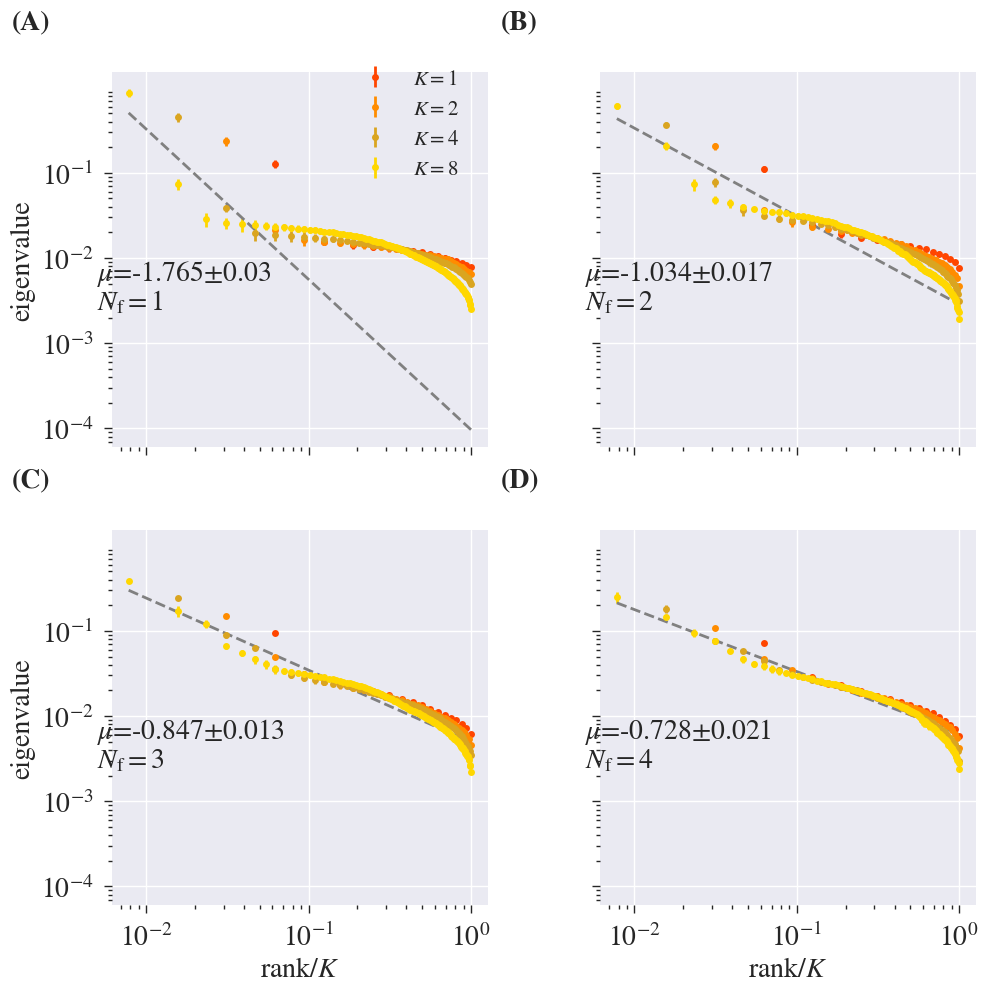

In [34]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= 'eigenvalue'   
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel('rank$/K$', fontsize=fontsize)
ax[1,1].set_xlabel('rank$/K$', fontsize=fontsize)
c=0
for h in np.array([0,1,2,3]):
    n=int(c/2)
    l=c-2*n
    errplot=allo.eigspecerr[h]
    xplot,plot=(allo.eigspecx[h], allo.eigspec[h])
    for m in range(len(errplot)):
        ax[n,l].errorbar(xplot[m], plot[m], yerr=errplot[m], \
                         label= r'$K=$'+str(2**(m)),\
                       color=palit[m+3], marker='o', \
                             markersize=5, linestyle='None', linewidth=2)
    popt=allo.mu[h]
    ax[n,l].plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=2)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].text(.005, .0055, r'$\mu$='+ str(np.round(popt[1],3))+r'$\pm$'\
               +str(np.round(allo.muerr[h]\
                             [0], 3)), fontsize=ticksize)
    ax[n,l].text(.005, .0025, r'$N_{\mathrm{f}}=$'+str(np.round(allo.label[h],2)), \
                                      fontsize=ticksize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_xscale('log')
    #ax[c].set_ylim(top=1)
    c+=1
    
for n in range(2):
    for l in range(2):
        ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.0015,5,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.0015,5,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.0015,5,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.0015,5,r'(D)', fontsize=ticksize, weight='bold')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=ticksize-5, loc=(.35,.81))
plt.tight_layout()
name=str(envname)+'eigs1234.pdf'
#plt.savefig(name)

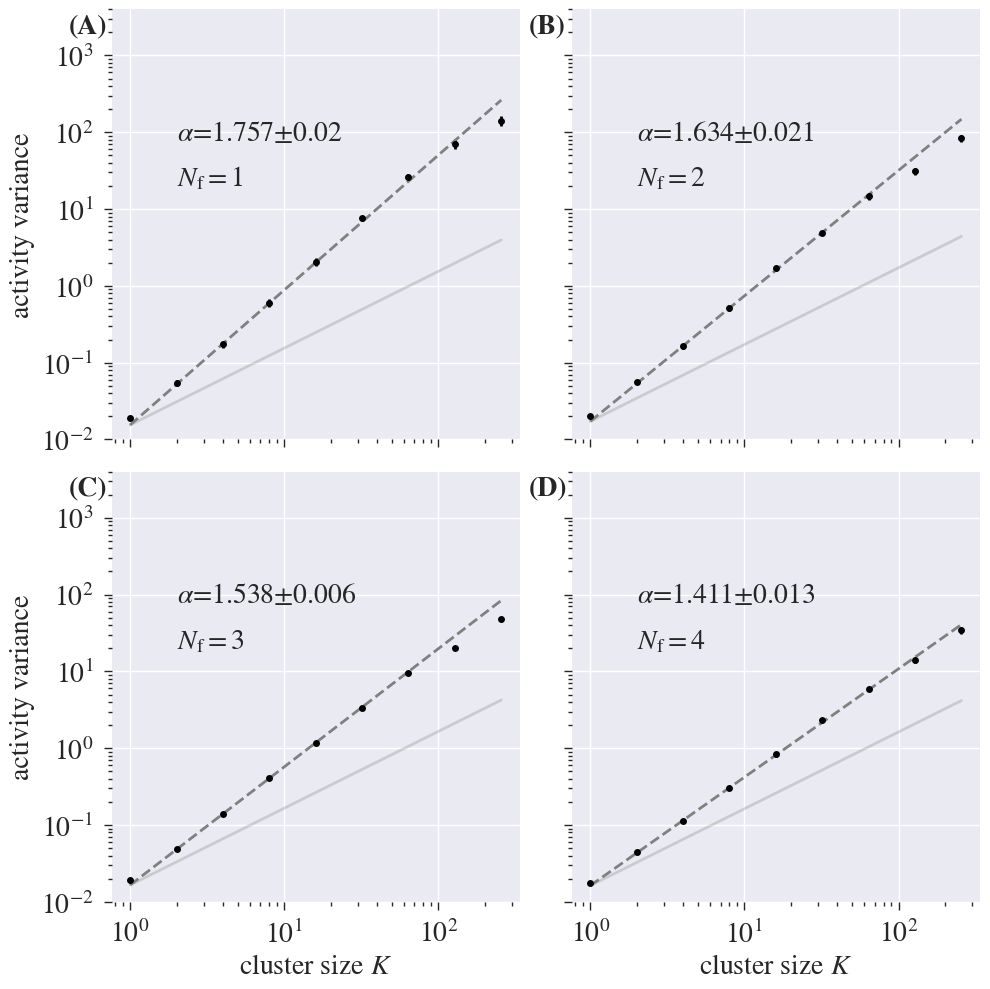

In [35]:
# variance of activity at each RG step over clusters
"""
plot coarse grained variance vs. cluster size
"""

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= 'activity variance' 
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsize)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsize)
c=0  
for h in np.array([0,1,2,3]):
    n=int(c/2)
    l=c-2*n
    ax[n,l].errorbar(allo.varx[h],allo.var[h],  allo.varerr[h], \
                     color='black', marker='o', markersize=5, linewidth=2, linestyle='None')
    popt = allo.alpha[h]
    ax[n,l].plot(allo.varx[h],linfunc(allo.varx[h], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=2)
    ax[n,l].plot(allo.varx[h], linfunc(allo.varx[h], popt[0], 1.), \
                    color=colorfit, linewidth=2, alpha=alpha)
    ax[n,l].text(2, 20, r'$N_{\mathrm{f}}=$'+str(np.round(allo.label[h],2)), fontsize=ticksize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].text(2, 80, r'${\alpha}$='+ str(np.round(popt[1],3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[h][0], 3)), fontsize=fontsize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_xscale('log')
    ax[n,l].set_ylim(top=4000, bottom=.01)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.4,2000,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.4,2000,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.4,2000,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.4,2000,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'var1234.pdf'
#plt.savefig(name)

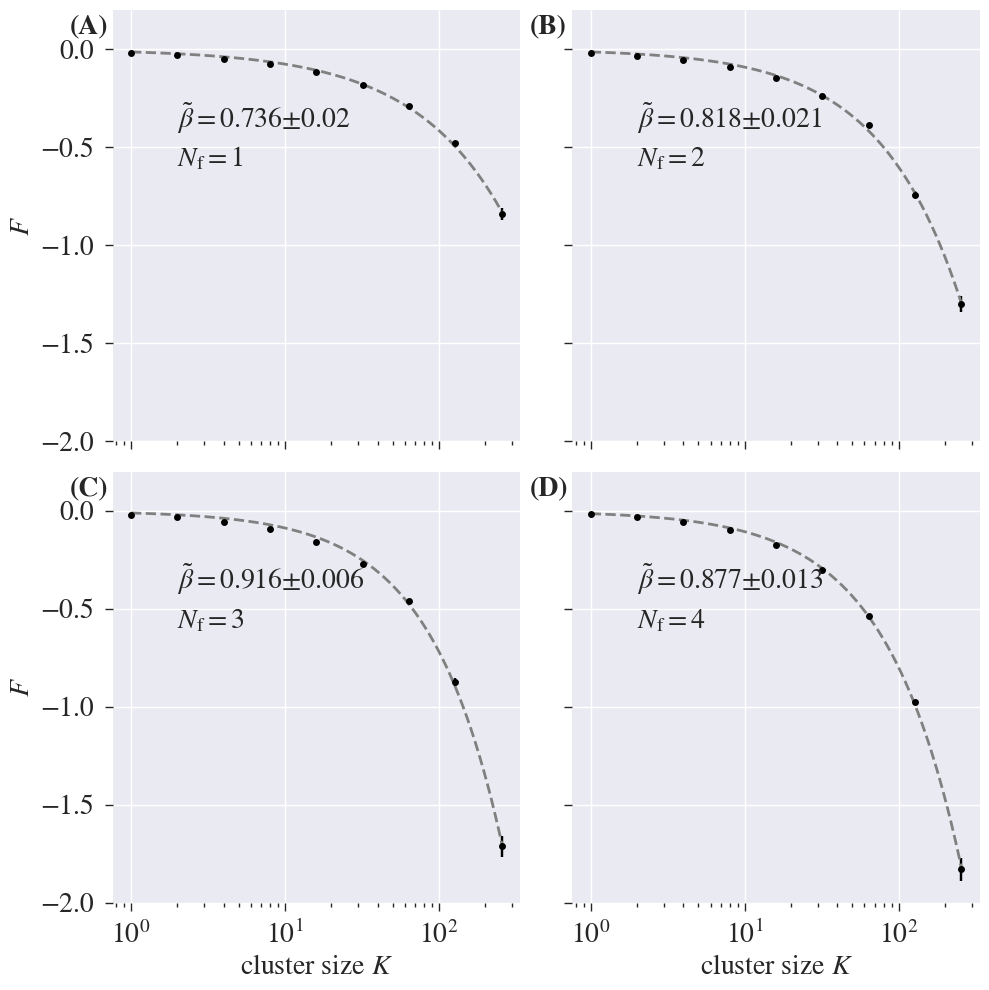

In [43]:
"""
Plot log probability of complete cluster silence vs cluster size
"""
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'$F$' 
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsize)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsize)
c=0 
for h in np.array([0,1,2,3]):
    n=int(c/2)
    l=c-2*n
    x=allo.psilx[h]
    y=allo.psil[h]
    popt= allo.beta[h]
    ax[n,l].errorbar(allo.psilx[h], allo.psil[h],allo.psilerr[h], \
                          color='black', marker='o', linestyle='None', markersize=5)
    ax[n,l].plot(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01), \
                           popt[0], popt[1])), '--', color=colorfit, linewidth=2)
    ax[n,l].text(2, -.6, r'$N_{\mathrm{f}}=$'+str(np.round(allo.label[h],2)),\
                       fontsize=ticksize)
    ax[n,l].text(2, -.4, r'$\tilde{\beta}=$'+str(np.round(popt[1], 3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[h][0], 3)),fontsize=ticksize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].set_xscale('log')
    ax[n,l].set_ylim(top=0.2, bottom=-2.0)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.4,.08,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.4,.08,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.4, .08,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.4,.08,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'freeenergy.pdf'
#plt.savefig(name)

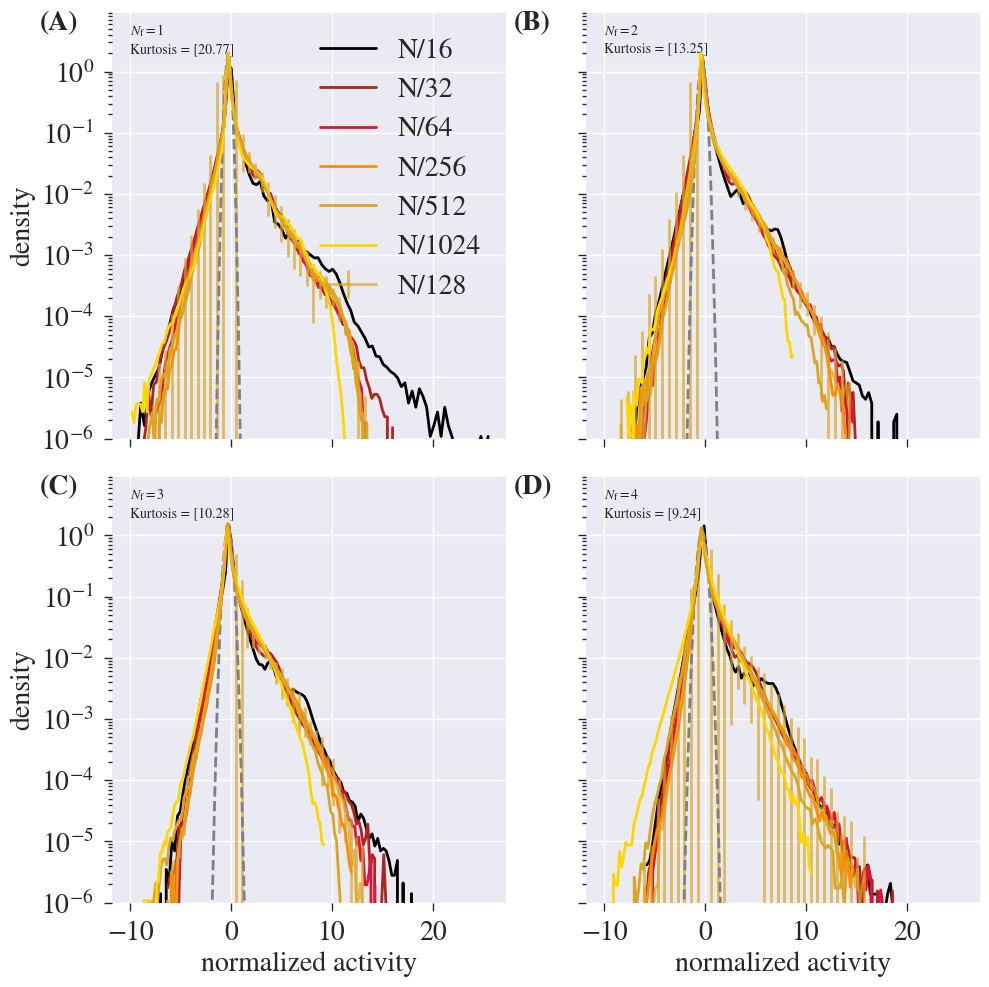

In [60]:
minnm=16
maxxm=128
mrangem=np.abs(minnm-maxxm)
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'density'
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel('normalized activity', fontsize=fontsize)
ax[1,1].set_xlabel('normalized activity', fontsize=fontsize)
c=0   
for h in np.array([0,1,2,3]):
    n=int(c/2)
    l=c-2*n
    for i in (np.arange(len(plterr[0]))):
        if i==3:
            ax[n,l].errorbar(x[h][i],plott[h][i], plterr[h][i], \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i+2], linewidth=2, errorevery=3, alpha=.7)
            popt, pcov = curve_fit(gaussian,x[h][i], plott[h][i])
            ax[n,l].plot(np.arange(-4, 4,.1), \
                    gaussian(np.arange(-4, 4, .1),\
                    popt[0], popt[1]), '--', color=colorfit, linewidth=2)
        else:
            ax[n,l].plot(x[h][i],plott[h][i],  \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i], linewidth=2)
    ax[n,l].text(-10, 4, r'$N_{\mathrm{f}}=$'+str(np.round(allo.label[h],2)), )
    ax[n,l].text(-10, 2, r'Kurtosis = '+str(np.round(allo.kurtosis[h],2)), )
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_ylim(bottom=10**-6, top=9)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].legend(fontsize=fontsize)
ax[0,0].text(-19,5,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-19,5,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-19,5,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-19,5,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'momdist.pdf'
#plt.savefig(name)